In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the tweet data from CSV

tweets_df = pd.read_csv('data/Elon_musk.csv', header=None, names=['S_no','Text'], encoding='latin1')
# Drop the first row
tweets_df.drop(0, inplace=True)

In [3]:
tweets_df.head()

,S_no,Text
1,1.0,@kunalb11 Im an alien
2,2.0,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,3.0,@joerogan @Spotify Great interview!
4,4.0,@gtera27 Doge is underestimated
5,5.0,@teslacn Congratulations Tesla China for amazi...


In [8]:
custom_stopwords = None
# Load custom stopwords from stop.txt
with open('data/stop.txt', 'r', encoding='latin1') as file:
    custom_stopwords = set(file.read().splitlines())
if '' in custom_stopwords:
    custom_stopwords.remove('')
print(custom_stopwords)

{'perhaps', 'would', 'certainly', 'will', 'me', 'whoever', 'get', "doesn't", 'respectively', 'how', 'went', 'certain', 'enough', "hadn't", 'que', 'unto', 'regards', 'each', 'yet', "won't", 'outside', 'accordingly', 'itself', 'an', 'x', 'cant', 'sensible', "couldn't", 'whole', "here's", 'anybody', "we'll", "i'll", 'apart', 'namely', 'getting', 'which', 'can', 'inward', 'anything', 'described', 'th', 'may', 'y', 'becomes', 'let', "you'd", "don't", 'keeps', "where's", 'than', 'within', 'changes', 'allows', 'or', 'regarding', 'serious', 'tends', 'six', 't', 'reasonably', 'throughout', 'specifying', 'like', 'up', 'behind', 'came', 'h', 'along', 'd', "ain't", 'is', 'nor', 'o', "you're", 'herself', 'want', 'happens', 'b', 'shall', 'towards', 'noone', 'gone', 'edu', 'the', 'again', 'all', 'help', 'rather', 'everyone', 'his', 'someone', 'soon', 'indicated', 'us', 'viz', 'well', 'it', "he's", 'indicate', 'causes', 'being', 'through', "aren't", 'should', 'secondly', 'though', 'under', 'by', 'beca

In [9]:
positive_words = None
# Load positive and negative word lists
with open('data/positive-words.txt', 'r', encoding='latin1') as file:
    positive_words = set(file.read().splitlines())
if '' in positive_words:
    positive_words.remove('')
print(positive_words)

{'accurate', 'admirably', 'stylishly', 'great', 'faith', 'glamorous', 'reputable', 'approve', 'merit', 'dumbfounded', 'colorful', 'prestige', 'cure-all', 'rapport', 'influential', 'afordable', 'triumphant', 'freshest', 'lively', 'warm', 'well-mannered', 'endorsement', 'quiet', 'extraordinarily', 'civilize', 'futurestic', 'enthral', 'law-abiding', 'wins', 'fancinating', 'respect', ';    1. The appearance of an opinion word in a sentence does not necessarily  ', 'flattering', 'stimulative', 'sporty', 'alluringly', 'eminence', 'rightfully', 'hale', 'clean', 'undaunted', 'delightfulness', 'endorses', 'excelent', 'gleefully', 'verifiable', 'improvement', 'well-received', 'outperformed', 'glad', 'achievement', 'enjoyably', 'accomplish', 'marvelled', 'achievements', 'righteousness', 'complement', 'romanticize', 'polite', 'timely', 'endorsing', 'preferable', 'sufficiently', 'charming', 'shimmeringly', 'revives', 'elated', 'comfort', 'unrestricted', 'beneficiary', 'instructive', 'profusion', 'c

In [10]:
negative_words = None
with open('data/negative-words.txt', 'r', encoding='latin1') as file:
   negative_words = set(file.read().splitlines())
if '' in negative_words:
    negative_words.remove('')
print(negative_words)

{'acerbically', 'omit', 'fat-cat', 'phobic', 'vehement', 'earsplitting', 'bleakness', 'inconsiderate', 'jutters', 'bereft', 'dazed', 'froze', 'harrow', 'irk', 'reviled', 'worries', 'debility', 'intractable', 'bullies', 'haughtily', 'impersonal', 'recklessness', 'get-rich', 'appal', 'aweful', 'disoriented', 'barbarous', 'inappropriate', 'foolish', 'madly', 'guilt', 'vengefully', 'eccentricity', 'waning', 'encroachment', 'stab', 'tangle', 'coupists', 'wobbles', 'inefficiently', 'incompliant', 'jarring', 'haphazard', 'nonresponsive', 'splitting', 'discontinuous', 'drunken', 'crumbling', 'disaster', 'frozen', 'hardships', 'belated', 'overreach', 'patronize', 'dead', 'imprecise', 'infernal', 'malevolently', 'disheartening', 'foolishness', 'furious', 'drunkard', 'punish', 'rubbish', 'stole', 'swollen', 'betray', 'rumor', 'illusions', 'desultory', 'indignantly', 'pale', 'violation', 'scourge', 'coward', 'barbarian', ';    1. The appearance of an opinion word in a sentence does not necessarily

In [11]:

# Function to perform sentiment analysis
def get_sentiment(tweet):
    words = tweet.lower().split()
    words = [word for word in words if word.isalpha() and word not in custom_stopwords]

    pos_word_count = sum(1 for word in words if word in positive_words)
    neg_word_count = sum(1 for word in words if word in negative_words)

    # Assign sentiment based on the counts of positive and negative words
    if pos_word_count > neg_word_count:
        return 'Positive'
    elif pos_word_count < neg_word_count:
        return 'Negative'
    else:
        return 'Neutral'



In [12]:
# Apply sentiment analysis to each tweet
tweets_df['Sentiment'] = tweets_df['Text'].apply(get_sentiment)

# Display the tweets with their sentiment analysis results
print(tweets_df[['Text', 'Sentiment']])

                                                   Text Sentiment
1                                @kunalb11 Im an alien   Neutral
2     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   Neutral
3                   @joerogan @Spotify Great interview!  Positive
4                       @gtera27 Doge is underestimated   Neutral
5     @teslacn Congratulations Tesla China for amazi...  Positive
...                                                 ...       ...
1995  @flcnhvy True, it sounds so surreal, but the n...  Negative
1996  @PPathole Make sure to read ur terms &amp; con...   Neutral
1997                @TeslaGong @PPathole Samwise Gamgee   Neutral
1998  @PPathole Altho Dumb and Dumber is <U+0001F525...  Negative
1999                          Progress update August 28  Positive

[1999 rows x 2 columns]


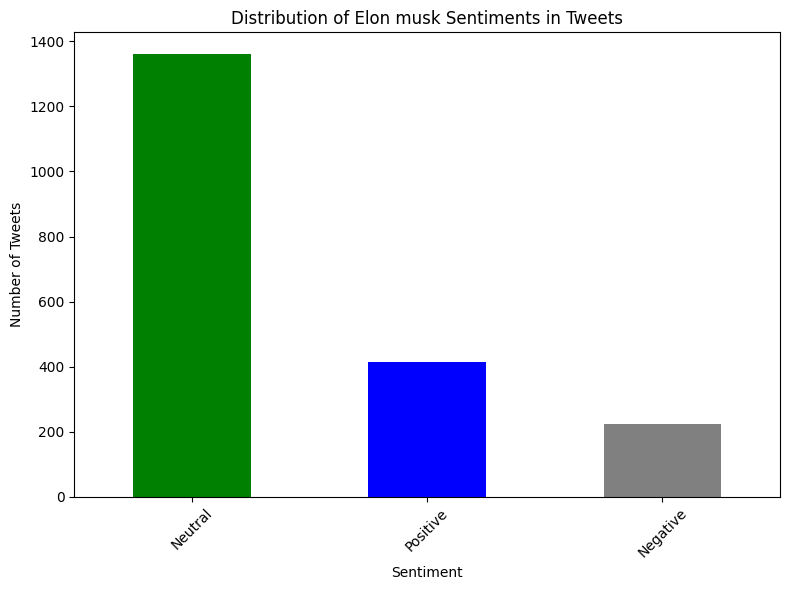

In [13]:
plt.figure(figsize=(8, 6))
sentiment_counts = tweets_df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Elon musk Sentiments in Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

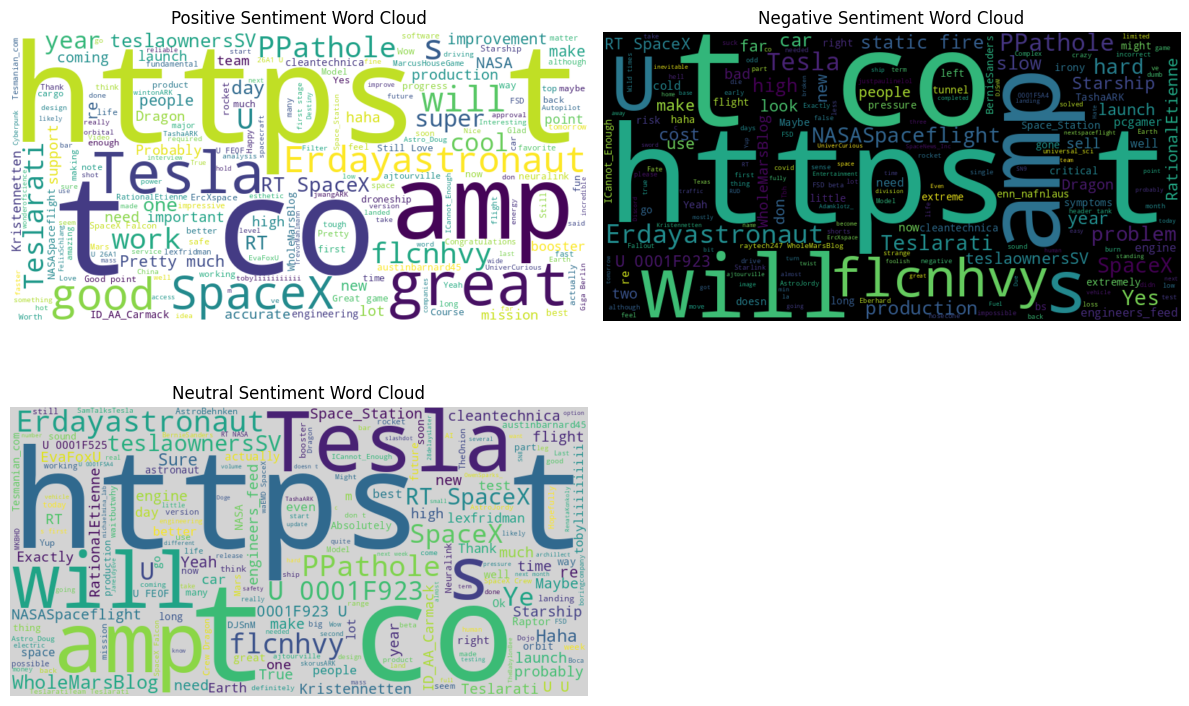

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Filter tweets by sentiment (positive, negative, neutral)
positive_tweets = ' '.join(tweets_df[tweets_df['Sentiment'] == 'Positive']['Text'])
negative_tweets = ' '.join(tweets_df[tweets_df['Sentiment'] == 'Negative']['Text'])
neutral_tweets = ' '.join(tweets_df[tweets_df['Sentiment'] == 'Neutral']['Text'])

# Create WordCloud objects for each sentiment
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_tweets)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='lightgrey').generate(neutral_tweets)

# Plotting word clouds for each sentiment
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()


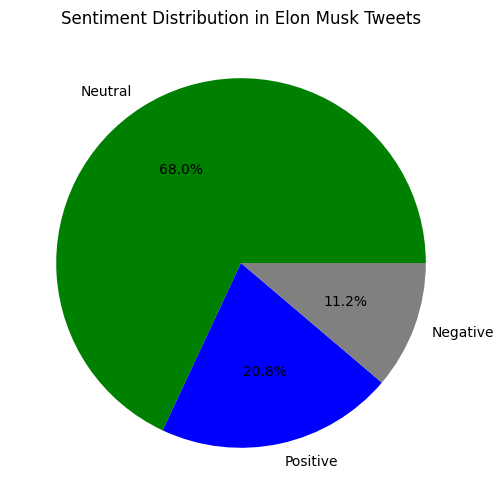

In [15]:
import matplotlib.pyplot as plt


# Calculate value counts of sentiments
sentiment_counts = tweets_df['Sentiment'].value_counts()

# Plotting pie chart for sentiment distribution
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'blue', 'gray'])
plt.title('Sentiment Distribution in Elon Musk Tweets')
plt.show()
